In [1]:
import pandas as pd
import numpy as np
import sklearn


In [2]:
watershed_bearriver = pd.read_excel("bearriver_01CD005_K_model.xlsx")
watershed_carruther = pd.read_excel("carruther_01CA003_P_model.xlsx").dropna()
watershed_wilmot    = pd.read_excel("wilmot_01CB004_P_model.xlsx").dropna()
watershed_dunkriver = pd.read_excel("dunkriver_01CB002_Q__model.xlsx").dropna()
watershed_winterriver= pd.read_excel("winterriver_01CC002_Q_model.xlsx").dropna()



In [3]:
title="watershed_winterriver"
df=watershed_winterriver[0:1826]
df.name=title

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
sns.set_context('poster')
#rcParams['font.size'] = 100
rcParams['font.family'] = "serif"

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,15
rcParams['font.size'] = 22

,Flow(m3/s),Level(m),Mean Temp (°C),Heat Deg Days (°C),Total Precip (mm),Dew Point Temp (°C),Rel Hum (%)
Date,,,,,,,
2018-01-01,0.354,0.427,-13.9,31.9,0.0,-16.737500,74.833333
2018-01-02,0.338,0.429,-14.5,32.5,0.0,-17.812500,76.875000
2018-01-03,0.324,0.430,-11.7,29.7,0.0,-18.316667,66.625000
2018-01-04,0.311,0.444,0.6,17.4,10.4,-3.370833,88.250000
2018-01-05,0.299,0.489,-4.2,22.2,0.6,-3.954167,77.416667
...,...,...,...,...,...,...,...
2019-12-27,0.534,0.440,-4.7,22.7,11.0,-6.520833,88.875000
2019-12-28,0.517,0.432,-0.3,18.3,0.0,-3.029167,78.375000
2019-12-29,0.500,0.429,-3.2,21.2,0.0,-8.095833,69.000000


In [44]:
#plt.title('BEARRIVER')
#plt.xlabel('Year')
#plt.ylabel('Level(m)')
#plt.plot(watershed_bearriver["Date"],watershed_bearriver["Level(m)"])

In [45]:
#plt.title('DUNKRIVER')
#plt.xlabel('Year')
#plt.ylabel('Level(m)')
#plt.plot(watershed_dunkriver["Date"],watershed_dunkriver["Level(m)"])

In [46]:
#plt.title('WINTERRIVER')
#plt.xlabel('Year')
#plt.ylabel('Level(m)')
#plt.plot(watershed_winterriver["Date"],watershed_winterriver["Level(m)"])

# Train Test split 
# 2015-2017(3 year span-train)
# 2018-2019(2 year span- test) 

In [47]:
df.name


'watershed_winterriver'

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])


In [49]:
df

,Date,Flow(m3/s),Level(m),Mean Temp (°C),Heat Deg Days (°C),Total Precip (mm),Dew Point Temp (°C),Rel Hum (%)
Date,,,,,,,,
2015-01-01,2015-01-01,1.370,1.245,-9.3,27.3,0.2,-12.295833,71.041667
2015-01-02,2015-01-02,1.370,1.244,-7.1,25.1,0.2,-9.408333,70.166667
2015-01-03,2015-01-03,1.270,1.230,-14.0,32.0,0.0,-20.750000,58.958333
2015-01-04,2015-01-04,1.280,1.231,-2.8,20.8,8.8,-7.458333,86.916667
2015-01-05,2015-01-05,1.400,1.249,-4.6,22.6,3.6,-4.458333,76.750000
...,...,...,...,...,...,...,...,...
2019-12-27,2019-12-27,1.070,1.331,-4.7,22.7,11.0,-6.520833,88.875000
2019-12-28,2019-12-28,1.100,1.335,-0.3,18.3,0.0,-3.029167,78.375000
2019-12-29,2019-12-29,1.030,1.323,-3.2,21.2,0.0,-8.095833,69.000000


# MIF on training data

In [51]:
mif_train=df[["Flow(m3/s)","Mean Temp (°C)","Heat Deg Days (°C)","Total Precip (mm)","Dew Point Temp (°C)","Rel Hum (%)"]]
mif_test=df["Level(m)"]
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(mif_train,mif_test)
mutual_info

array([2.84406691, 0.17538148, 0.15065826, 0.01286096, 0.13931453,
       0.        ])

In [52]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = mif_train.columns
mutual_info.sort_values(ascending=False)

Flow(m3/s)             2.844067
Mean Temp (°C)         0.175381
Heat Deg Days (°C)     0.150658
Dew Point Temp (°C)    0.139315
Total Precip (mm)      0.012861
Rel Hum (%)            0.000000
dtype: float64

<AxesSubplot:>

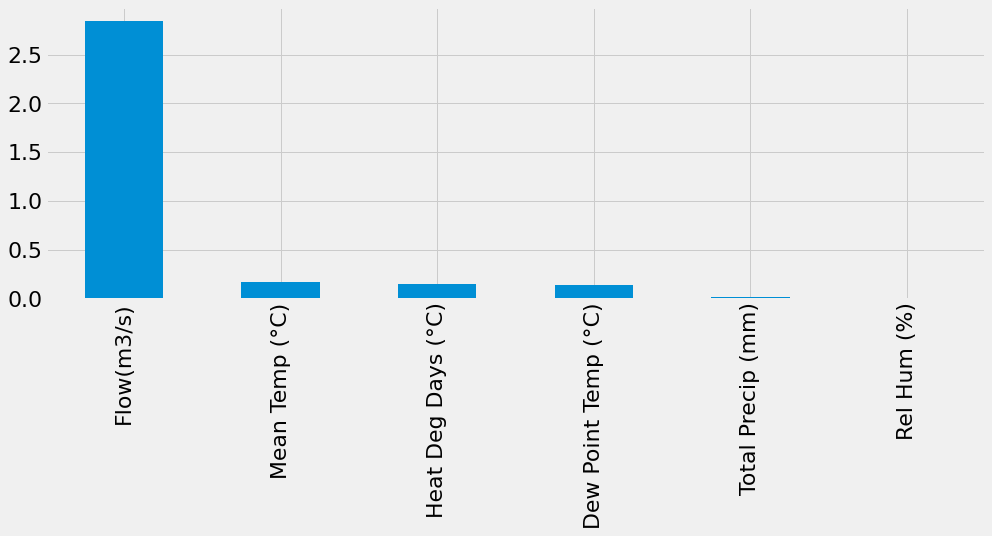

In [53]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [60]:
## Selecting the top 20/30 percentile
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(mif_train.fillna(0),mif_test)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x000001A349346040>)

In [61]:
selected_top_columns.get_support()

array([ True,  True,  True, False, False, False])

In [62]:
mif_train.columns[selected_top_columns.get_support()]

Index(['Flow(m3/s)', 'Mean Temp (°C)', 'Heat Deg Days (°C)'], dtype='object')